In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import yfinance as yf
import numexpr
import numpy as np


In [2]:
assetList=["NU","JPM","BAC","C","MS","GS"]
data=yf.download(
            tickers=assetList,
            period="1y",
            interval="1d",
            group_by ='ticker'
        )
completeData=yf.download(
            tickers=assetList,
            period="1y",
            interval="1d",
            group_by ='ticker'
        )
data


[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed


C                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2021-12-20  58.599998  58.730000  57.590000  58.279999  56.027721  31619600   
2021-12-21  58.740002  59.860001  58.650002  59.380001  57.085217  23175100   
2021-12-22  59.310001  59.939999  59.099998  59.599998  57.296707  14760600   
2021-12-23  59.990002  60.779999  59.950001  60.209999  57.883137  15223300   
2021-12-27  60.400002  60.939999  60.000000  60.650002  58.306137  14035400   
...               ...        ...        ...        ...        ...       ...   
2022-12-13  46.840000  47.849998  46.240002  46.590000  46.590000  25655400   
2022-12-14  46.509998  47.040001  45.720001  45.980000  45.980000  16587500   
2022-12-15  45.090000  45.259998  44.130001  44.619999  44.619999  20201900   
2022-12-16  44.200001  44.660000  43.810001  44.349998  44.349998  26954300   
2022-12-19  44.360001  44.480000  43.480000  43.930000  43.930000  18007800   

              NU                      ...         MS                         \
            Open    High   Low Close  ...        Low       Close  Adj Close   
Date                                  ...                                     
2021-12-20  9.20   9.350  8.75  8.94  ...  94.209999   95.370003  92.128113   
2021-12-21  9.02   9.240  8.84  9.23  ...  96.070000   97.769997  94.446526   
2021-12-22  9.12   9.180  8.99  9.12  ...  97.459999   98.300003  94.958519   
2021-12-23  9.13  10.000  9.11  9.83  ...  98.769997   99.339996  95.963165   
2021-12-27  9.79   9.890  9.46  9.74  ...  99.110001  100.400002  96.987129   
...          ...     ...   ...   ...  ...        ...         ...        ...   
2022-12-13  4.20   4.210  3.87  3.88  ...  92.070000   92.709999  92.709999   
2022-12-14  3.90   3.910  3.76  3.82  ...  89.870003   90.500000  90.500000   
2022-12-15  3.80   3.880  3.72  3.74  ...  86.919998   87.790001  87.790001   
2022-12-16  3.76   3.925  3.76  3.90  ...  85.830002   86.860001  86.860001   
2022-12-19  3.88   3.940  3.81  3.91  ...  84.959999   85.550003  85.550003   

                             JPM                                      \
              Volume        Open        High         Low       Close   
Date                                                                   
2021-12-20  11931400  154.509995  154.699997  151.839996  153.940002   
2021-12-21   8235100  155.410004  157.179993  155.089996  156.089996   
2021-12-22   4798400  155.750000  157.059998  155.240005  156.699997   
2021-12-23   4482200  157.610001  159.119995  157.210007  157.259995   
2021-12-27   4196000  157.600006  158.199997  156.339996  158.160004   
...              ...         ...         ...         ...         ...   
2022-12-13  10330500  136.889999  137.089996  133.080002  134.080002   
2022-12-14   7704600  133.779999  135.710007  132.759995  133.410004   
2022-12-15   8795200  131.149994  132.080002  129.050003  130.100006   
2022-12-16  17262000  129.149994  129.899994  128.429993  129.289993   
2022-12-19   5127900  129.649994  131.330002  129.089996  130.059998   

                                  
             Adj Close    Volume  
Date                              
2021-12-20  149.229858  15148000  
2021-12-21  151.314056  11291300  
2021-12-22  151.905396   7273000  
2021-12-23  152.448257   8055200  
2021-12-27  153.320740   6188100  
...                ...       ...  
2022-12-13  134.080002  10025400  
2022-12-14  133.410004   9966100  
2022-12-15  130.100006  12087800  
2022-12-16  129.289993  21126400  
2022-12-19  130.059998   9015400  

[252 rows x 36 columns]

In [3]:
data=data.fillna(0)
headers=data.columns.values.tolist()
for header in headers:
    if not header[1]==("Close"):
        data=data.drop(columns=header)

data
        


,C,NU,GS,BAC,MS,JPM
,Close,Close,Close,Close,Close,Close
Date,,,,,,
2021-12-20,58.279999,8.94,371.609985,43.160000,95.370003,153.940002
2021-12-21,59.380001,9.23,380.320007,44.189999,97.769997,156.089996
2021-12-22,59.599998,9.12,382.329987,44.279999,98.300003,156.699997
2021-12-23,60.209999,9.83,385.040009,44.419998,99.339996,157.259995
2021-12-27,60.650002,9.74,388.040009,44.639999,100.400002,158.160004
...,...,...,...,...,...,...
2022-12-13,46.590000,3.88,368.690002,32.750000,92.709999,134.080002
2022-12-14,45.980000,3.82,360.380005,32.279999,90.500000,133.410004


## Exploratory Analisis

#### Average Stock Price per Month

se encuentra el promedio mensual de los precios por accion de banco

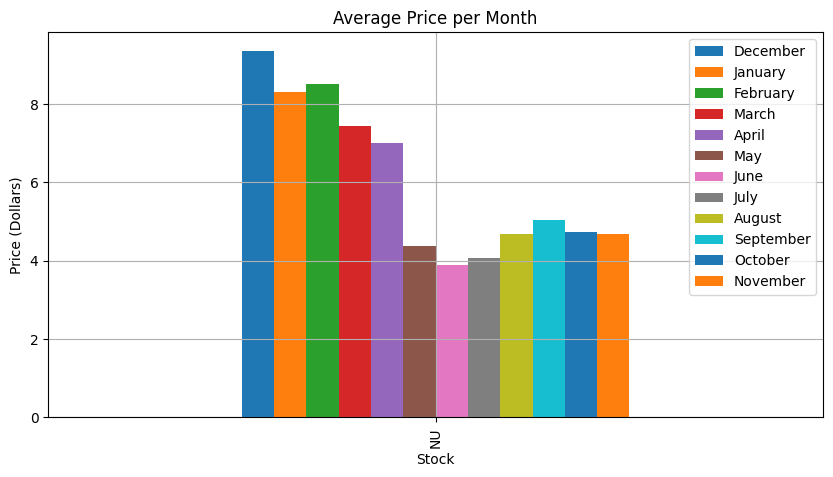

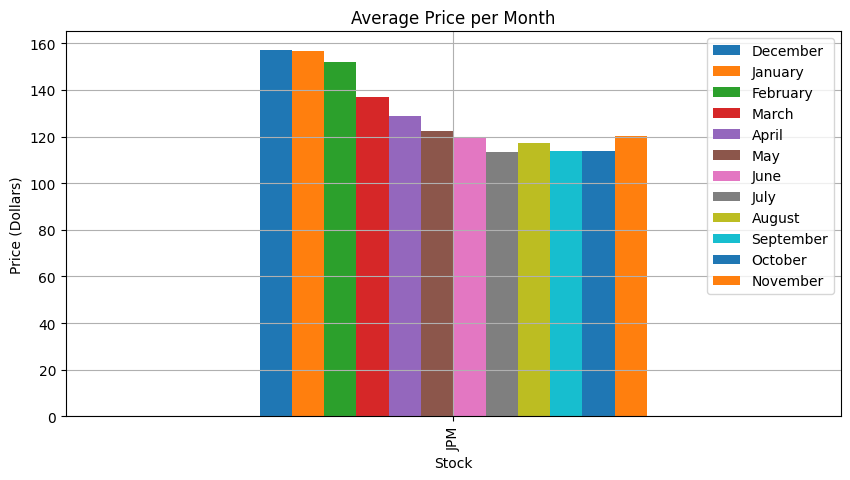

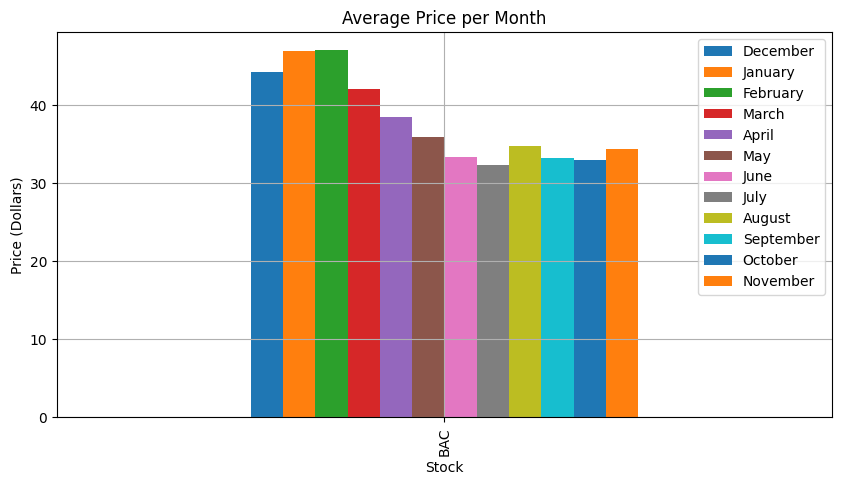

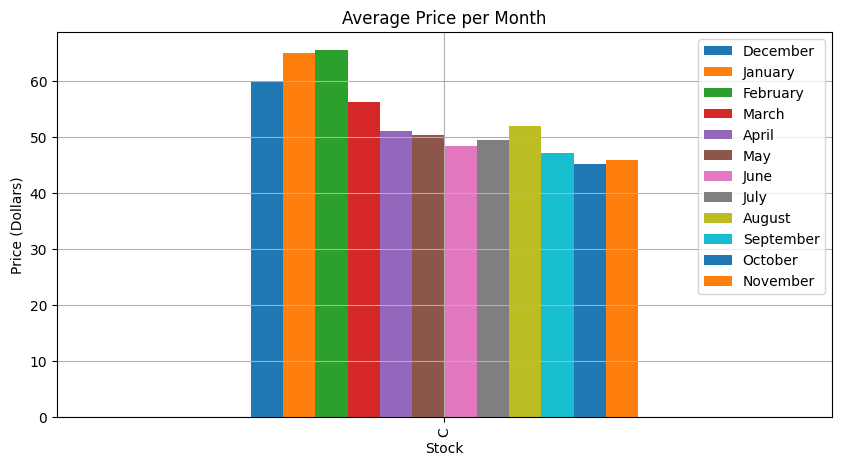

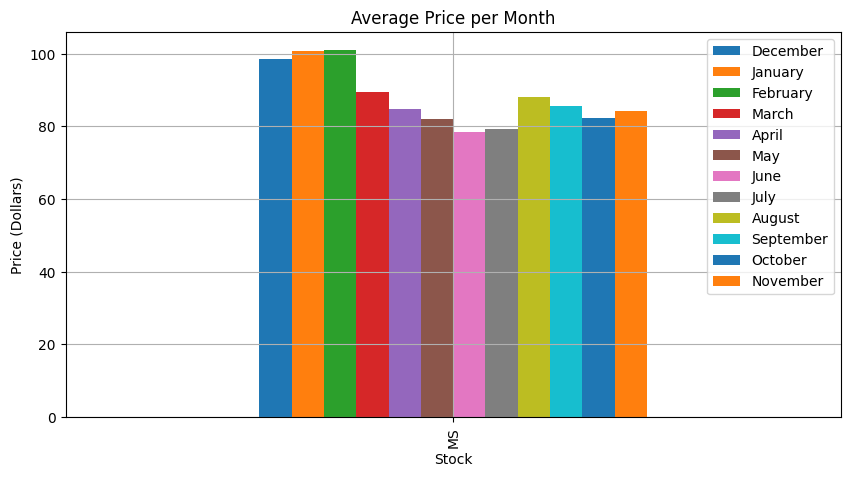

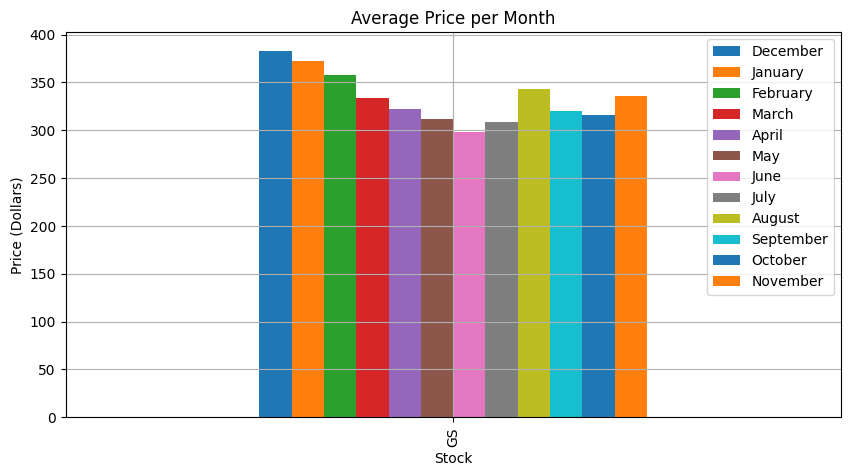

In [4]:
averagePricePerMonthPerStock={}


for asset in assetList:
    allAssetClosings=data[asset]
    averagePerMonth=[]
 
    for i in range(0,12):
        
        if i==0:
            dailyAssetPriceMonth=allAssetClosings[(allAssetClosings.index>"2021-12-1") & (allAssetClosings.index<"2021-12-31") ]
            
        if i>0 and i<10:
            beginDate="2022-0{}-1".format(i)
            endDate="2022-0{}-31".format(i)
            if i==2:
                endDate="2022-0{}-28".format(i)
            
            if i==4 or i==6 or i==9:
                endDate="2022-0{}-30".format(i)
            
            dailyAssetPriceMonth=allAssetClosings[(allAssetClosings.index>pd.to_datetime(beginDate)) & (allAssetClosings.index<pd.to_datetime(endDate)) ]
    
                
            
        elif i>9:
            date="2022-{}-1".format(i)
            endDate="2022-{}-31".format(i)
            if i==11:
                endDate="2022-{}-30".format(i)
            
            dailyAssetPriceMonth=allAssetClosings[(allAssetClosings.index>pd.to_datetime(beginDate)) & (allAssetClosings.index<pd.to_datetime(endDate)) ]
            
        
        average=float(dailyAssetPriceMonth.mean())
        averagePerMonth.append(average)
        
        
     
    averagePricePerMonthPerStock[asset]=averagePerMonth
    

averagePricePerMonthPerStock=pd.DataFrame.from_dict(averagePricePerMonthPerStock,orient='index')
averagePricePerMonthPerStock.rename(columns={0: "December", 1: "January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November"},inplace=True)


for asset in assetList:
    selection=averagePricePerMonthPerStock[averagePricePerMonthPerStock.index==asset]
    
    selection.plot.bar(
    title="Average Price per Month",
    xlabel="Stock",
    ylabel="Price (Dollars)",
    figsize=(10,5),
    grid=True
    )

    





#### Central Tendency Measures

In [5]:
centralMeasures={}

for asset in assetList:
    measures=[]
    selection=averagePricePerMonthPerStock[averagePricePerMonthPerStock.index==asset]
    median=float(selection.median(axis=1))
    percentageChangeMaxMin=float(((selection.max(axis=1)-selection.min(axis=1))/selection.max(axis=1))*100)
    
    measures.append(median)
    measures.append(percentageChangeMaxMin)
    
    
    centralMeasures[asset]=measures
    
centralMeasuresDf=pd.DataFrame.from_dict(centralMeasures,orient='index')
centralMeasuresDf.rename(columns={0: "Median",1:"Percentage Change between Max and Min"},inplace=True)
print(centralMeasuresDf)

         Median  Percentage Change between Max and Min
NU     4.889849                              58.349594
JPM  121.341774                              27.785404
BAC   35.391738                              31.132945
C     50.696724                              31.013900
MS    85.222895                              22.372024
GS   328.183322                              22.104569


## Relationship Between Trade Volume and spikes or drops in Stock Price

#### First we will compare using the average trade volume per month per stock

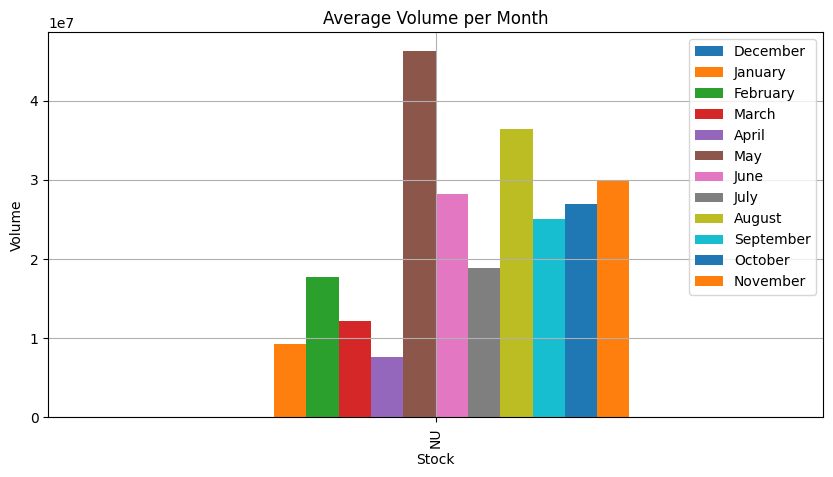

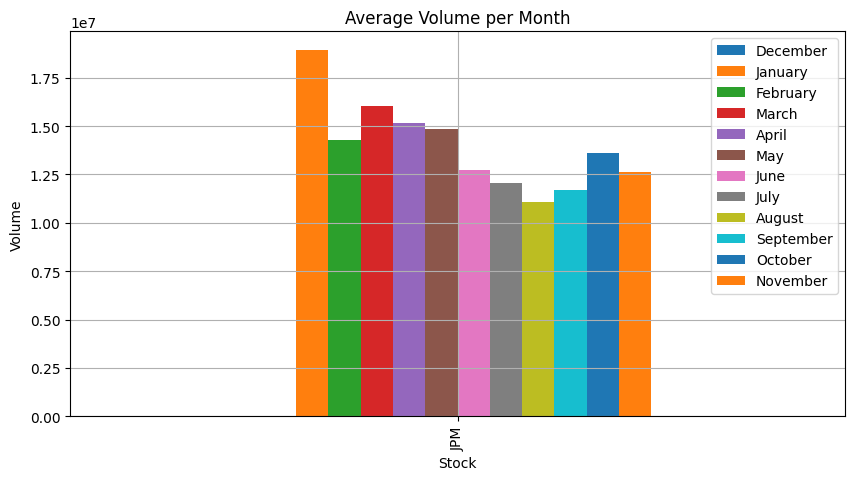

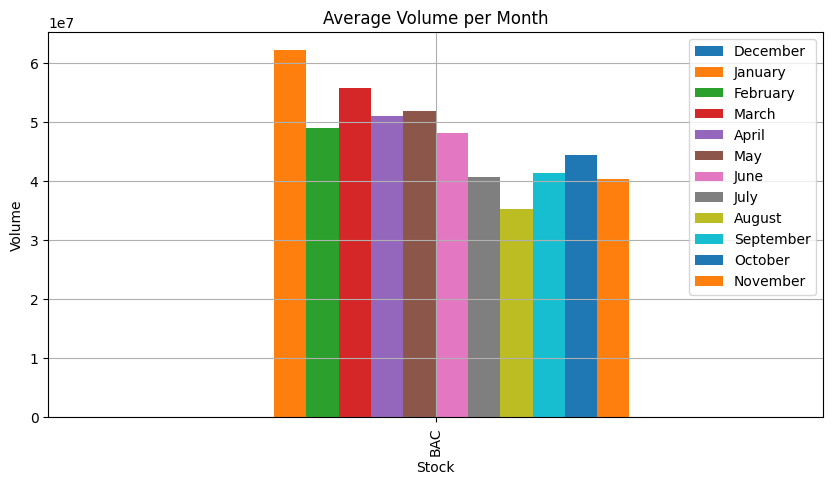

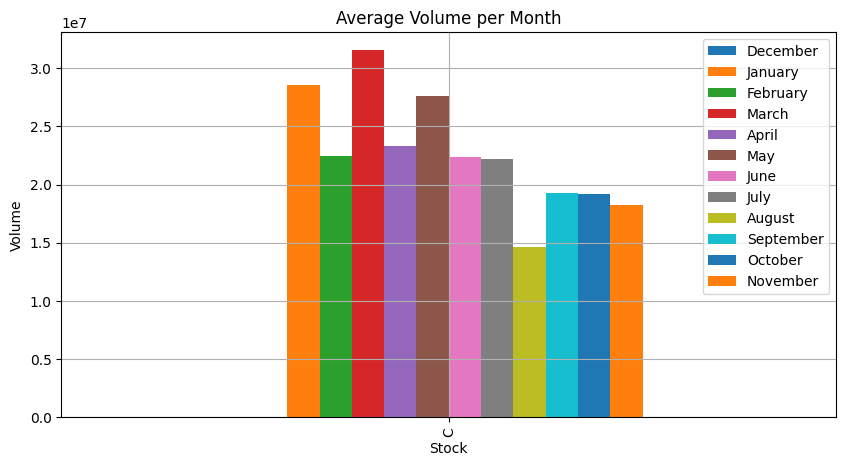

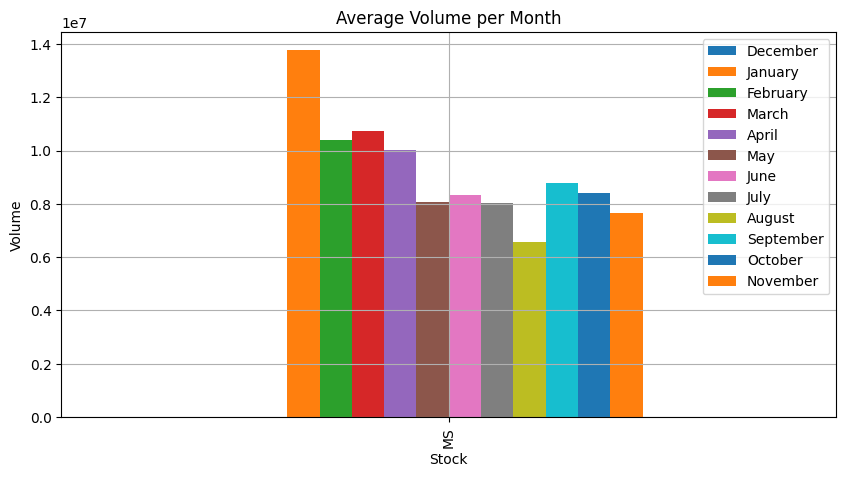

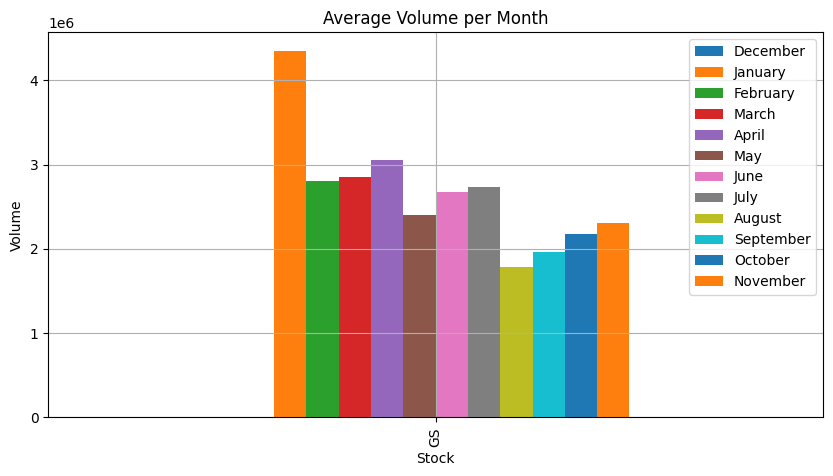

In [6]:
averageVolumePerMonthPerStock={}
for asset in assetList:
    allAssetVolumes=completeData[asset]["Volume"]
    averagePerMonth=[]

    for i in range(0,12):
        
        if i==0:
            dailyAssetVolumeMonth=allAssetClosings[(allAssetVolumes.index>"2021-12-1") & (allAssetVolumes.index<"2021-12-31") ]
        
        
            
        if i>0 and i<10:
            beginDate="2022-0{}-1".format(i)
            endDate="2022-0{}-31".format(i)
            if i==2:
                endDate="2022-0{}-28".format(i)
            
            if i==4 or i==6 or i==9:
                endDate="2022-0{}-30".format(i)
            
            dailyAssetVolumeMonth=allAssetVolumes[(allAssetVolumes.index>pd.to_datetime(beginDate)) & (allAssetVolumes.index<pd.to_datetime(endDate)) ]
    
                
            
        elif i>9:
            date="2022-{}-1".format(i)
            endDate="2022-{}-31".format(i)
            if i==11:
                endDate="2022-{}-30".format(i)
            
            dailyAssetVolumeMonth=allAssetVolumes[(allAssetVolumes.index>pd.to_datetime(beginDate)) & (allAssetVolumes.index<pd.to_datetime(endDate)) ]
            
        
        
        average=float(dailyAssetVolumeMonth.mean())
        averagePerMonth.append(average)
        
    averageVolumePerMonthPerStock[asset]=averagePerMonth
    
    
averageVolumePerMonthPerStock=pd.DataFrame.from_dict(averageVolumePerMonthPerStock,orient='index')
averageVolumePerMonthPerStock.rename(columns={0: "December", 1: "January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November"},inplace=True)
for asset in assetList:
    selection=averageVolumePerMonthPerStock[averageVolumePerMonthPerStock.index==asset]
    
    selection.plot.bar(
    title="Average Volume per Month",
    xlabel="Stock",
    ylabel="Volume",
    figsize=(10,5),
    grid=True
    )





### We Check if Volume and price have Correlation

we create a scatterplot of Nubank Volume and Price during the year

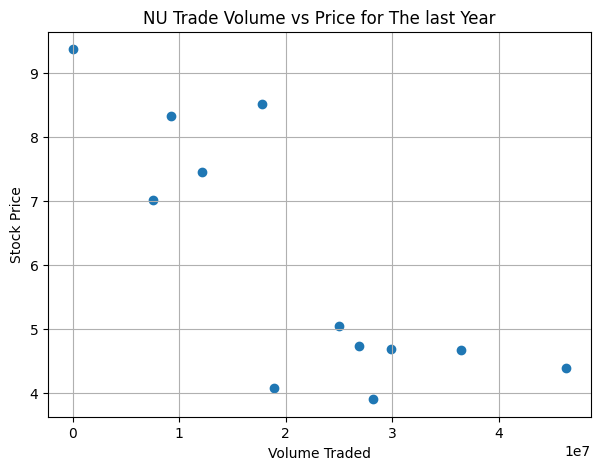

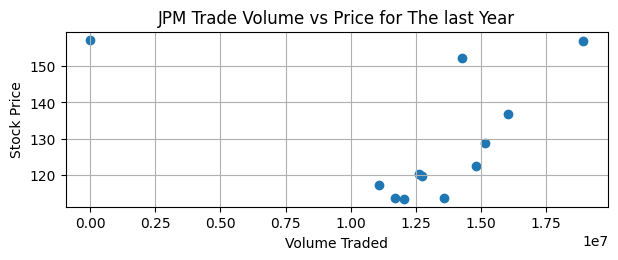

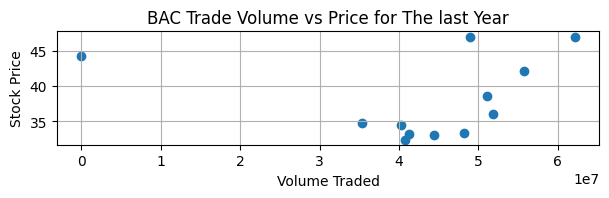

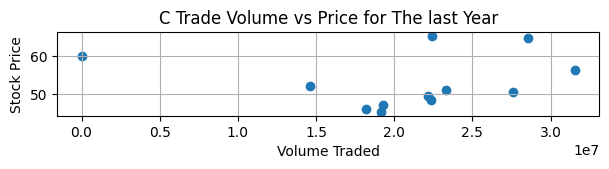

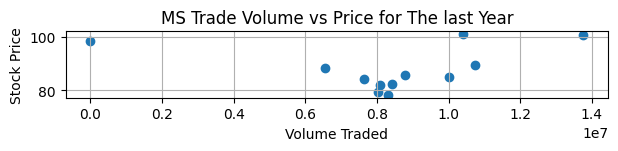

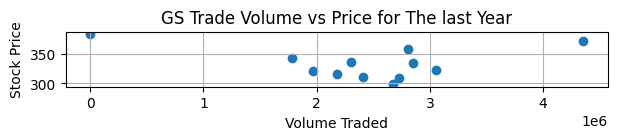

In [46]:
count=1


for asset in assetList:
    volume=averageVolumePerMonthPerStock[averageVolumePerMonthPerStock.index==asset]
    price=averagePricePerMonthPerStock[averageVolumePerMonthPerStock.index==asset]
    
    
    
    plt.figure(figsize=(7, 5))
    plt.subplot(count,1,count)
    plt.scatter(
        x=volume.values.tolist(),
        y=price.values.tolist()
    )
    plt.title("{} Trade Volume vs Price for The last Year".format(asset))
    plt.xlabel("Volume Traded")
    plt.ylabel("Stock Price")
    plt.grid(True)
    
    count+=1



#### We check for Covariance/Correlationship betweenn volume traded and stock price during 2022 for each stock

formula Cov(X,Y)=E((X-xmean)(y-ymean))        p=Corr(x,y)=Cov(x,y)/srt(xvariance*yvariance)

In [48]:
def buildCovMatrix(xList,yList,xmean,ymean,xvar,yvar):

    
    xLen=len(xList)
    covMatrix=np.zeros((2,2))
    multiXY=np.multiply(xList,yList)
    multiXY=np.around(multiXY,decimals=4)
    
    meanXY=np.mean(multiXY)
    
    covXY=meanXY-(xmean*ymean)
    
    
    covMatrix[0][0]=xvar
    covMatrix[0][1]=covXY
    covMatrix[1][0]=covXY
    covMatrix[1][0]=yvar
    
    
    return covMatrix
    

for asset in assetList:
    volume=averageVolumePerMonthPerStock[averageVolumePerMonthPerStock.index==asset]
    price=averagePricePerMonthPerStock[averageVolumePerMonthPerStock.index==asset]
    
    volume=volume.round(decimals=4)
    price=price.round(decimals=4)
    
    volume=volume.drop(["December"],axis=1)
    price=price.drop(["December"],axis=1)
    
    volumeAvg=volume.mean(axis=1)
    priceAvg=price.mean(axis=1)
    
    volumeVar=volume.var(axis=1)
    priceVar=price.var(axis=1)
    
    covMatrix=buildCovMatrix(volume.values.tolist(),price.values.tolist(),volumeAvg,priceAvg,volumeVar,priceVar)
    
    print(covMatrix[0][1]/math.sqrt(volumeVar*priceVar))
    

    

-0.6547621458384916
0.7311186040897972
0.6653549995108604
0.4473596035958627
0.6588471479691289
0.45106656101489295
